<a href="https://colab.research.google.com/github/shareefat/machine-learning-/blob/main/mall_customer_hierarchy_clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv("/content/Mall_Customers_2.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
df.shape

(200, 5)

In [3]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [5]:
x=df[['Annual Income (k$)','Spending Score (1-100)']]
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scal=scaler.fit_transform(x)

DENDOGRAM:-A dendogram is a tree like diagram that records the sequences of merges or split more the distance of the vertical lines

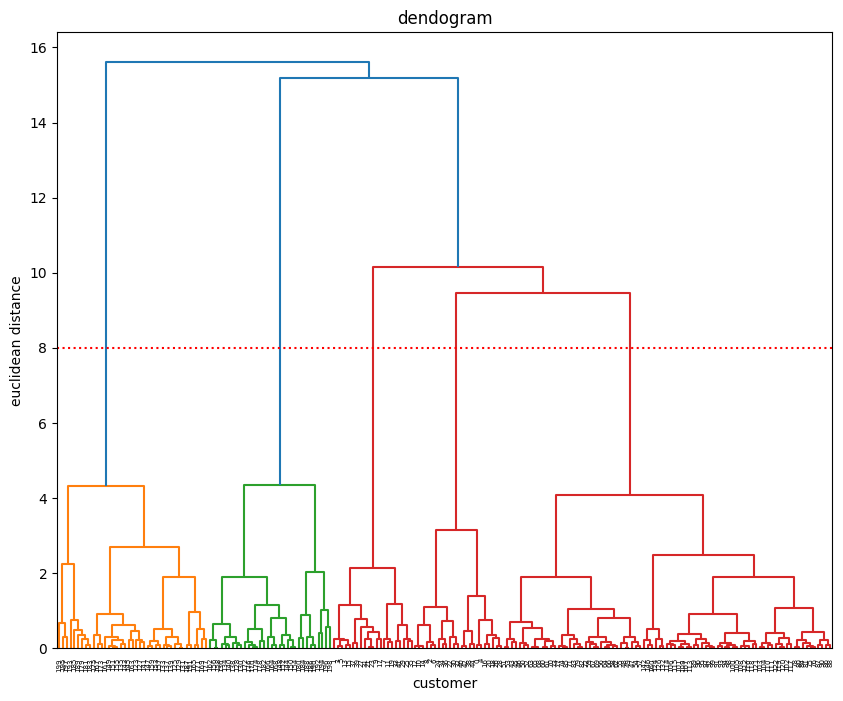

In [14]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,8)
import scipy.cluster.hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(x_scal,method='ward'))
plt.axhline(y=8,color='r',linestyle=':')
plt.title("dendogram")
plt.xlabel('customer')
plt.ylabel('euclidean distance')
plt.show()

In [20]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='ward')
model.fit(x_scal)

AgglomerativeClustering(n_clusters=5)

In [28]:
y=model.fit_predict(x_scal)
y[:5]

array([4, 3, 4, 3, 4])

In [22]:
df['label']=y

In [27]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,0


In [35]:
x['cluster']=y

<ipython-input-35-65e8ed9ce558>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cluster']=y


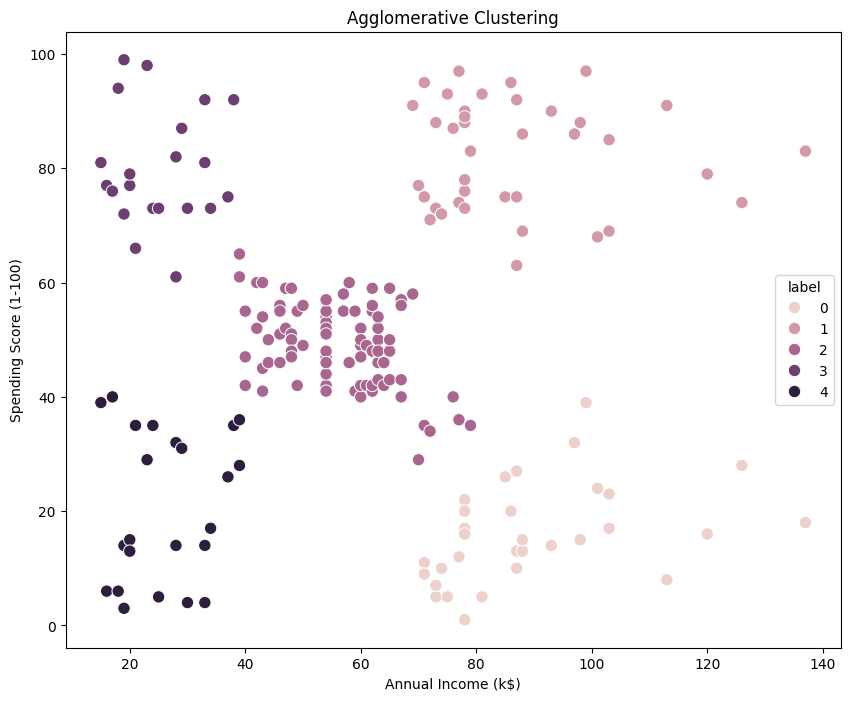

In [33]:
import seaborn as sns
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='label',data=df,s=80)
plt.title('Agglomerative Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [45]:
new_data=[1,2]
new_data=scaler.transform([new_data])
new_data

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-2.2733712 , -1.87119923]])

In [46]:
model.fit_predict(new_data)
#

ValueError: Found array with 1 sample(s) (shape=(1, 2)) while a minimum of 2 is required by AgglomerativeClustering.